In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
previous_application_data = pd.read_csv('data/previous_application.csv')
print(previous_application_data.shape)
# Display the first few rows of the DataFrame
print(previous_application_data['NAME_CONTRACT_STATUS'].unique())

(1670214, 37)
['Approved' 'Refused' 'Canceled' 'Unused offer']


In [74]:
print(previous_application_data['NAME_CONTRACT_STATUS'].unique())

['Approved' 'Refused' 'Canceled' 'Unused offer']


In [75]:
rejected_borrowers=pd.DataFrame(previous_application_data['SK_ID_CURR'])
rejected_borrowers['NAME_CONTRACT_STATUS']=previous_application_data['NAME_CONTRACT_STATUS']
rejected_borrowers = rejected_borrowers.dropna()

rejected_borrowers['REJECTED'] = np.where(rejected_borrowers['NAME_CONTRACT_STATUS'] == 'Refused', 1, 0)
print(previous_application_data['NAME_CONTRACT_STATUS'].unique())
#rejected_borrowers['REJECTED'] = 1
rejected_borrowers

['Approved' 'Refused' 'Canceled' 'Unused offer']


,SK_ID_CURR,NAME_CONTRACT_STATUS,REJECTED
0,271877,Approved,0
1,108129,Approved,0
2,122040,Approved,0
3,176158,Approved,0
4,202054,Refused,1
...,...,...,...
1670209,352015,Approved,0
1670210,334635,Approved,0
1670211,249544,Approved,0
1670212,400317,Approved,0


In [76]:
rejected_borrowers_sorted=rejected_borrowers.sort_values(by='REJECTED', ascending=False)
rejected_borrowers_final=rejected_borrowers_sorted.drop_duplicates(subset='SK_ID_CURR', keep='first')
print(rejected_borrowers_final.shape)

(338857, 3)


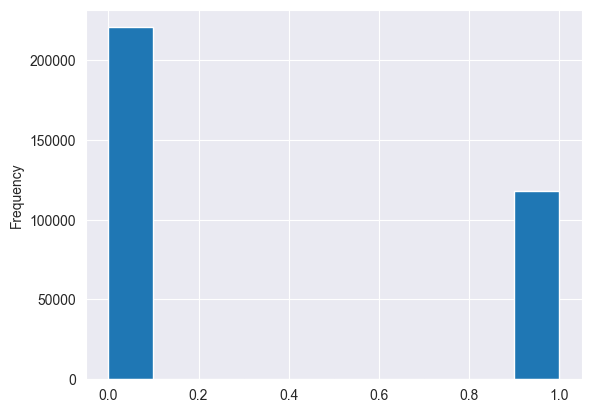

In [77]:
rejected_borrowers_final['REJECTED'].astype(int).plot.hist();


In [78]:
%store -r xgb_data
print(xgb_data.shape)
xgb_data_risk=pd.merge(xgb_data,rejected_borrowers_final, on='SK_ID_CURR', how='inner').fillna(0)

(307511, 240)


In [80]:
print(xgb_data_risk.shape)
xgb_data_risk = xgb_data_risk.drop('NAME_CONTRACT_STATUS', axis=1)
print(xgb_data_risk.shape)
%store  xgb_data_risk

(291057, 242)
(291057, 241)
Stored 'xgb_data_risk' (DataFrame)


bureau.csv AMT_CREDIT_MAX_OVERDUE


(7453, 230)
Stored 'xgb_rej' (DataFrame)
